<div style="background-color: #faf0e6; border: 2px solid #ccc; padding: 8px; text-align: center;">
    <h1 style="color: #696969; margin: 8px 0;">Traffic Vehicle Real Time Detection - EDA Notebook 1 of 2</h1>
    <p style="color: #696969; font-size: 20px; margin: 5px 0 0;">
        <span style="display: inline-block; text-align: center; width: 100%;">
            Dataset: 
            <a href="https://datasetninja.com/vehicle-dataset-for-yolo" style="color: #0066cc; text-decoration: none;">
                https://datasetninja.com/vehicle-dataset-for-yolo
            </a>
            <br>
            Chris Heimbuch: 
            <a href="https://github.com/chrisheimbuch" style="color: #0066cc; text-decoration: none;">
                https://github.com/chrisheimbuch
            </a>
        </span>
    </p>
</div>

![headerPhoto.jpeg](./images/headerPhoto.jpeg)

## Table of Contents

- [Overview](#Overview)
    - [Section 1: Data Organization](#Section-1:-Data-Organization)
    - [Section 2: Descriptive Questions](#Section-2:-Descriptive-Questions)
    - [Section 3: Inferential Analysis](#Section-3:-Inferential-Analysis)
    - [Section 4: Analysis](#Section-4:-Analysis)

# Overview

This image dataset consists of 6 different classes of vehicles including cars, trucks, vans, buses, motorbikes, and threewheels. There are 2100 training images and 900 testing images. The images have annotations bounding boxes included which include the height and width of each image, and each respective class, and geometry type to surround the object. In this notebook, I will organize all of my images into folders, and perform an EDA on the image data to understand what we are working with!

In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os
import shutil
import json
from collections import Counter
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## Section 1: Data Organization

In [2]:
#Defining path to my training images.

path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train"

In [3]:
#Make new directories

cars = os.path.join(path, "cars")
vans = os.path.join(path, "vans")
trucks = os.path.join(path, "trucks")
motorcycles = os.path.join(path, "motorcycles")
buses = os.path.join(path, "buses")
threewheels = os.path.join(path, "threewheels")
multiclass = os.path.join(path, "multiclass")

#Create new directories of all classes
os.makedirs(cars, exist_ok=True)
os.makedirs(vans, exist_ok=True)
os.makedirs(trucks, exist_ok=True)
os.makedirs(motorcycles, exist_ok=True)
os.makedirs(buses, exist_ok=True)
os.makedirs(threewheels, exist_ok=True)
os.makedirs(multiclass, exist_ok=True)


In [5]:
#set class specific output paths
annotations_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\ann"
images_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\img"
bus_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\buses"
cars_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\cars"
motorcycles_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\motorcycles"
threewheels_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\threewheels"
trucks_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\trucks"
vans_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\vans"
multiclass_path = r"C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\source\train\multiclass"

In [8]:
#create a dictionary to map class names to paths
class_to_path = {
    "bus": bus_path,
    "car": cars_path,
    "motorbike": motorcycles_path,
    "threewheel": threewheels_path,
    "truck": trucks_path,
    "van": vans_path
}

#ensure class folders exist
for path in class_to_path.values():
    if not os.path.exists(path):
        os.makedirs(path)

#loop through all annotation files
for annotation_file in os.listdir(annotations_path):
    if annotation_file.endswith('.json'): 
        # Open and read the annotation file
        with open(os.path.join(annotations_path, annotation_file)) as f:
            data = json.load(f)
            
            # Iterate through objects in the annotation file
            for obj in data['objects']:
                class_name = obj['classTitle'].lower()  # Get the class title and convert to lowercase
                
                if class_name in class_to_path:  # Check if the class is in the dictionary
                    image_filename = annotation_file.replace('.json', '')  # Remove the .json extension to get the actual image filename

                    # Create the destination path for the image
                    dest_path = class_to_path[class_name]
                    
                    # Source path of the image
                    image_src = os.path.join(images_path, image_filename)
                    image_dest = os.path.join(dest_path, image_filename)

                    # Copy or move the image to the class directory
                    if os.path.exists(image_src):
                        shutil.copy(image_src, image_dest)
                    else:
                        print(f"Image {image_filename} not found.")

In [12]:
# Create a dictionary to map class names to paths
class_to_path = {
    "bus": bus_path,
    "car": cars_path,
    "motorbike": motorcycles_path,
    "threewheel": threewheels_path,
    "truck": trucks_path,
    "van": vans_path
}

# Ensure class folders and multiclass folder exist
for path in list(class_to_path.values()) + [multiclass_path]:
    if not os.path.exists(path):
        os.makedirs(path)

# Loop through all annotation files
for annotation_file in os.listdir(annotations_path):
    if annotation_file.endswith('.json'):
        # Open and read the annotation file
        with open(os.path.join(annotations_path, annotation_file)) as f:
            data = json.load(f)

        # Get the image filename from the annotation file (assumes filename ends with .jpg)
        image_filename = annotation_file.replace('.json', '')

        # Get all unique class names in the image
        object_classes = set(obj['classTitle'].lower() for obj in data.get('objects', []))

        # Determine destination path based on the number of unique classes
        if len(object_classes) > 1:
            dest_path = multiclass_path  # If multiple classes, move to multiclass folder
        else:
            # Handle single-class images
            if object_classes:
                class_name = list(object_classes)[0]
                dest_path = class_to_path.get(class_name, multiclass_path)
            else:
                dest_path = multiclass_path  # Default to multiclass if no class found

        # Source path of the image
        image_src = os.path.join(images_path, image_filename)
        image_dest = os.path.join(dest_path, image_filename)

        # Move the image to the destination path
        if os.path.exists(image_src):
            shutil.move(image_src, image_dest)  # Use shutil.copy() if you want to copy instead of move
            print(f"Moved image {image_filename} to {dest_path}.")
        else:
            print(f"Image {image_filename} not found.")

Moved image 00043_GMC Savana Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00077.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00116.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00175_Ford E-Series Wagon Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00241.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00294.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\cars.
Moved image 00300_Nissan NV Passenger Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_5\p5_capstone_project\train\vans.
Moved image 00391_Mercedes-Benz Sprinter Van 2012.jpg to C:\Users\Chris\Documents\Flatiron\Course Materials\Ph

## Section 2: Descriptive Questions

## 1. What is the class distribution among the images?

In [45]:
# Define paths to your class directories
class_directories = {
    'bus': bus_path,
    'car': cars_path,
    'motorcycles': motorcycles_path,
    'threewheel': threewheels_path,
    'truck': trucks_path,
    'van': vans_path,
    'multiclass': multiclass_path
}

# Initialize a dictionary to store the count of images per class
class_counts = {}

# Loop through each folder and count the number of images
for class_name, folder_path in class_directories.items():
    if not os.path.exists(folder_path):
        print(f"Directory not found: {folder_path}")
        continue  # Skip if folder doesn't exist
    
    # List all files in the class folder
    try:
        image_files = os.listdir(folder_path)
    except OSError as e:
        print(f"Error accessing folder {folder_path}: {e}")
        continue

    # Filter files that are either .jpg, .jpeg, or .png (case-insensitive)
    valid_extensions = ('.jpg', '.jpeg', '.png')
    image_files = [f for f in image_files if f.lower().endswith(valid_extensions)]

    # Store the count of images for the current class
    class_counts[class_name] = len(image_files)

# Print the distribution of images per class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'bus' has 320 images.
Class 'car' has 345 images.
Class 'motorcycles' has 328 images.
Class 'threewheel' has 309 images.
Class 'truck' has 358 images.
Class 'van' has 334 images.
Class 'multiclass' has 106 images.


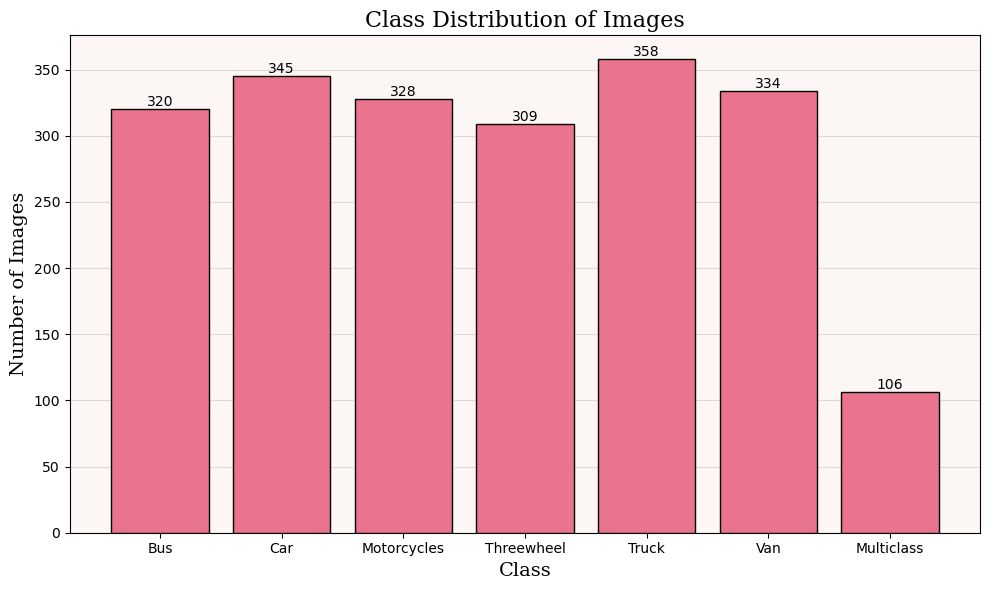

In [44]:
# Data (the class_counts dictionary from the previous step)
class_names = [name.title() for name in class_counts.keys()]
image_counts = list(class_counts.values())

#Custom Font Dictionaries
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(class_names, image_counts, color='#EA738D', edgecolor="black", linewidth=1, zorder=3)

# Add labels and title
plt.xlabel('Class', fontdict=font2)
plt.ylabel('Number of Images', fontdict=font2)
plt.title('Class Distribution of Images', fontdict=font1)
ax.grid(axis='y', alpha=0.4)
ax.set_facecolor('#FCF6F5')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom', fontsize=10)

# Display the bar chart
plt.tight_layout()
plt.show()

## 2. What is the distribution of image aspect ratios?

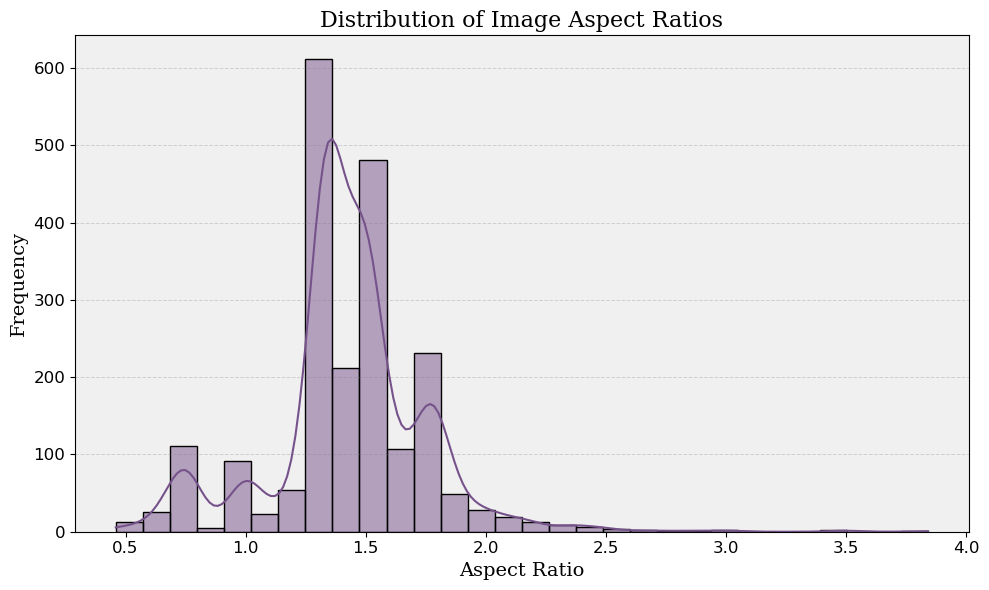

In [50]:
# Empty list to store aspect ratios
aspect_ratios = []

#Loop through each class and its corresponding directory
for class_name, folder_path in class_directories.items():
    
    #Check if the folder exists
    if os.path.exists(folder_path):
        #Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            #Check if it's an image file (JPG, PNG, JPEG)
            if os.path.isfile(image_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    #Open the image and get its dimensions
                    with Image.open(image_path) as img:
                        width, height = img.size
                        # Calculate the aspect ratio (width / height)
                        aspect_ratio = width / height
                        aspect_ratios.append(aspect_ratio)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

# Convert aspect ratios list to a DataFrame for visualization
aspect_data = pd.DataFrame(aspect_ratios, columns=['Aspect_Ratio'])

# Set up the plot
plt.figure(figsize=(10, 6))

# Custom font styling
font1 = {'family':'serif', 'color':'black', 'size':16}
font2 = {'family':'serif', 'color':'black', 'size':14}

# Set up the histogram plot with data
sns.histplot(aspect_data['Aspect_Ratio'], bins=30, kde=True, color='#76528BFF')

# Set title and axis names
plt.title("Distribution of Image Aspect Ratios", fontdict=font1)
plt.xlabel("Aspect Ratio", fontdict=font2)
plt.ylabel("Frequency", fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid customization
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()


## 3. What is the distribution of widths and heights of all the images?

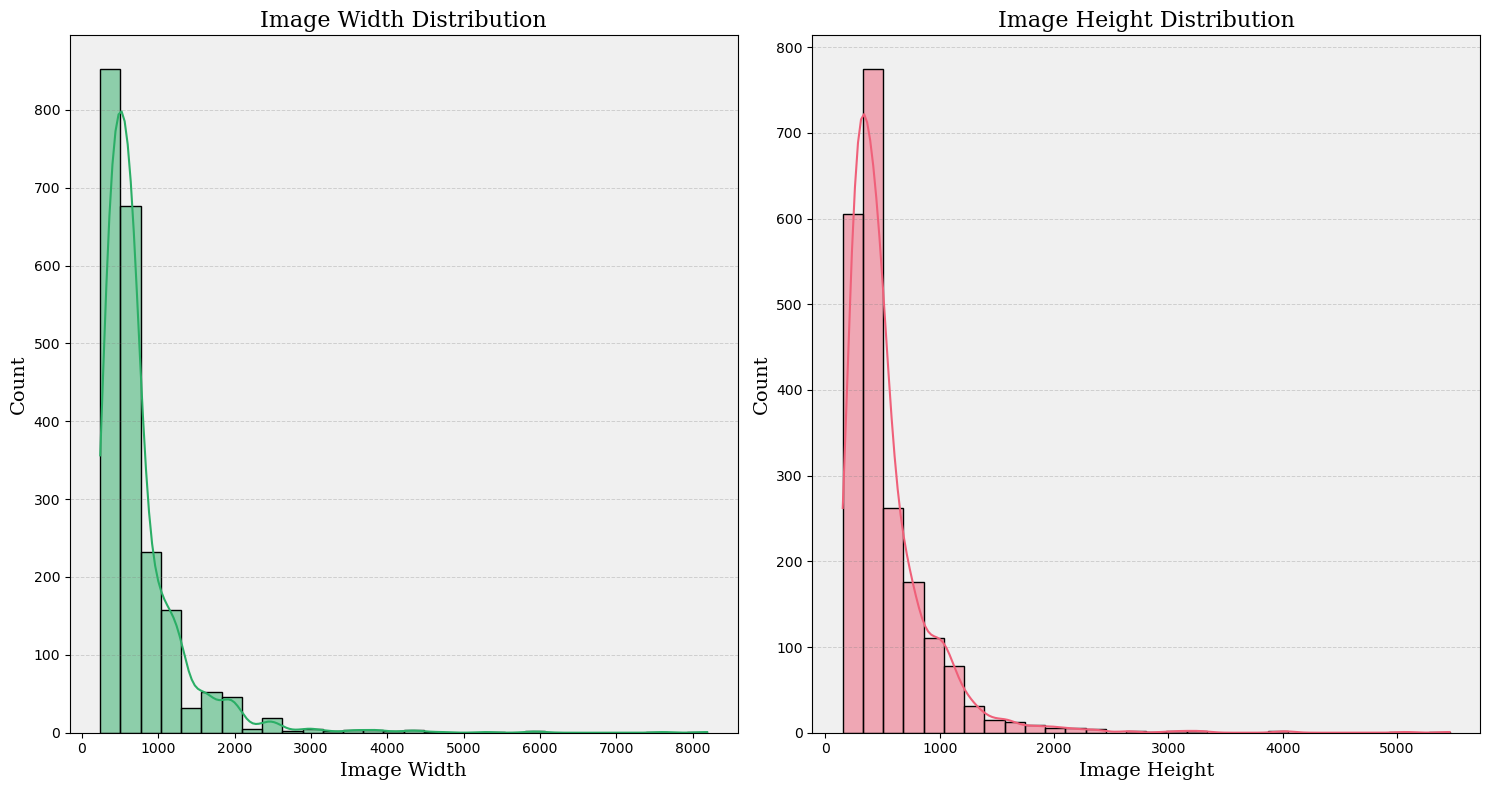

In [52]:
# Empty list to store aspect ratios
width_list = []
height_list = []

#Loop through each class and its corresponding directory
for class_name, folder_path in class_directories.items():
    
    #Check if the folder exists
    if os.path.exists(folder_path):
        #Loop through each image file in the folder
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            #Check if it's an image file (JPG, PNG, JPEG)
            if os.path.isfile(image_path) and filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                try:
                    #Open the image and get its dimensions
                    with Image.open(image_path) as img:
                        width, height = img.size
                        width_list.append(width)
                        height_list.append(height)
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

# Plot the width and height distributions
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Custom font styling
font1 = {'family':'serif', 'color':'black', 'size':16}
font2 = {'family':'serif', 'color':'black', 'size':14}

# Plot for image widths
sns.histplot(width_list, ax=ax[0], bins=30, kde=True, color='#2BAE66FF')
ax[0].set_title('Image Width Distribution', fontdict=font1)
ax[0].set_xlabel("Image Width", fontdict=font2)
ax[0].set_ylabel("Count", fontdict=font2)

#Grid customization for axis 0
ax[0].set_facecolor('#f0f0f0')
ax[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3)

# Plot for image heights
sns.histplot(height_list, ax=ax[1], bins=30, kde=True, color='#EF6079FF')
ax[1].set_title('Image Height Distribution', fontdict=font1)
ax[1].set_xlabel("Image Height", fontdict=font2)
ax[1].set_ylabel("Count", fontdict=font2)


#Grid customization for axis 1
ax[1].set_facecolor('#f0f0f0')
ax[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. What are the average Red channel intensities among the images?

In [53]:
#Initialize a list to store RGB channel intensities
rgb_data = []


#Loop through each class and its corresponding directory
for class_name, folder_path in class_directories.items():
    
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            
            #Open the image
            with Image.open(image_path) as img:
                #Convert the image to RGB 
                img = img.convert('RGB')
                
                #Convert image data to a NumPy array (easier to manipulate)
                img_array = np.array(img)
                
                #Calculate mean intensity for each channel (R, G, B)
                red_mean = np.mean(img_array[:, :, 0])  # Red channel
                green_mean = np.mean(img_array[:, :, 1])  # Green channel
                blue_mean = np.mean(img_array[:, :, 2])  # Blue channel
                
                # Store the results in the list
                rgb_data.append([filename, red_mean, green_mean, blue_mean])

# Create a DataFrame to display the RGB intensities
rgb_df = pd.DataFrame(rgb_data, columns=['Image_Name', 'Red_Intensity', 'Green_Intensity', 'Blue_Intensity'])

In [54]:
rgb_df

,Image_Name,Red_Intensity,Green_Intensity,Blue_Intensity
0,10089046903_0f33f88596_n.jpg,134.837148,152.157305,167.897201
1,10229976934_e4e11a02d4_n.jpg,137.603216,135.216263,133.885039
2,10607289286_c0b7785a33_w.jpg,112.960412,113.140805,112.279429
3,1083397061_adbc19c10b_n.jpg,130.041445,132.313750,131.399010
4,112442550_992704402f_n.jpg,94.602552,96.416523,94.938906
...,...,...,...,...
2095,van14.jpeg,112.084488,80.663618,80.867800
2096,van67.jpeg,116.145833,120.764589,102.160310
2097,weligama-sri-lanka-march-7-260nw-191454845.jpg,136.903205,137.877152,134.264432
2098,YLAO3G9WUQKG.jpg,137.157339,130.373776,121.991933


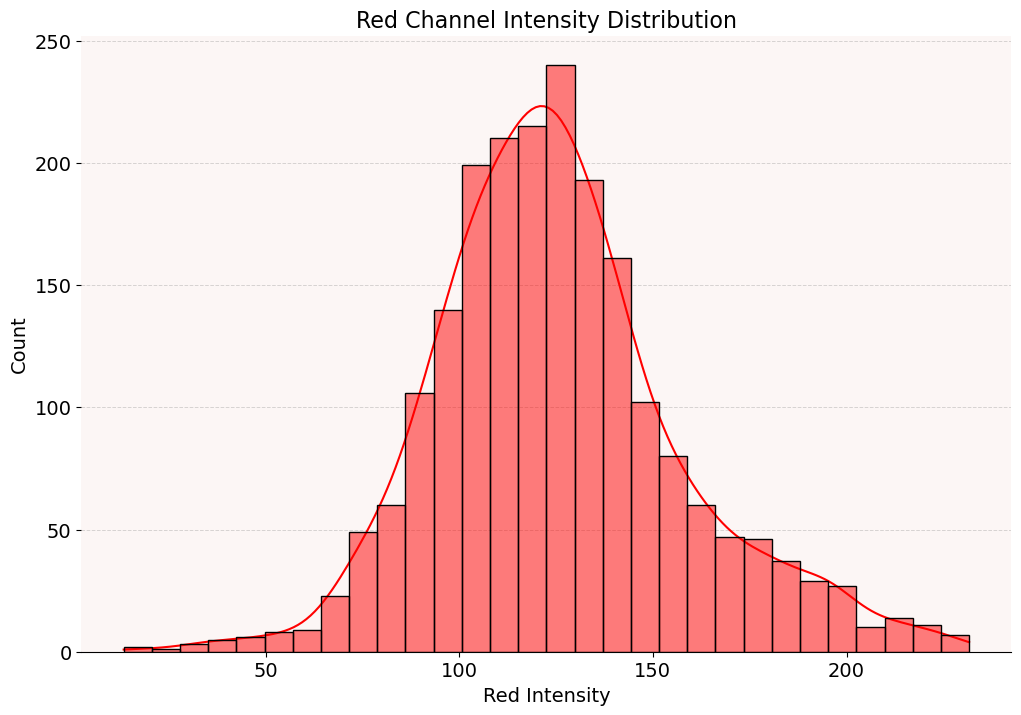

In [55]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for the Red channel
sns.histplot(rgb_df['Red_Intensity'], bins=30, color='red', kde=True, zorder=3)

#Set Title, x & y axis names, face color
plt.title('Red Channel Intensity Distribution', fontsize=16)
ax.set_xlabel("Red Intensity",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
ax.set_facecolor('#FCF6F5')

#Remove lines of grid perimeter to make more appealing.
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Set background of grid to custom color.
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3, zorder=1)

#Display plot
plt.show()

### 5. What are the average Green channel intensities among the images?

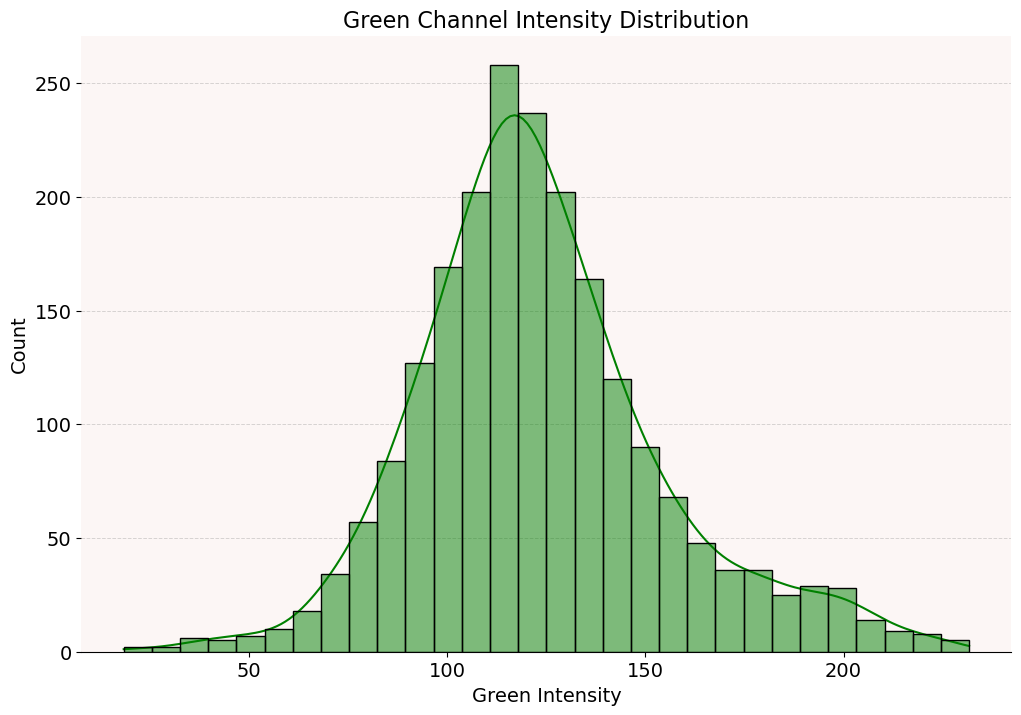

In [56]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for the Green channel
sns.histplot(rgb_df['Green_Intensity'], bins=30, color='green', kde=True, zorder=3)

#Set Title, x & y axis names, face color
plt.title('Green Channel Intensity Distribution', fontsize=16)
ax.set_xlabel("Green Intensity",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
ax.set_facecolor('#FCF6F5')

#Remove lines of grid perimeter to make more appealing.
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Set background of grid to custom color.
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3, zorder=1)

#Display plot
plt.show()

### 6. What are the average Blue channel intensities among the images?

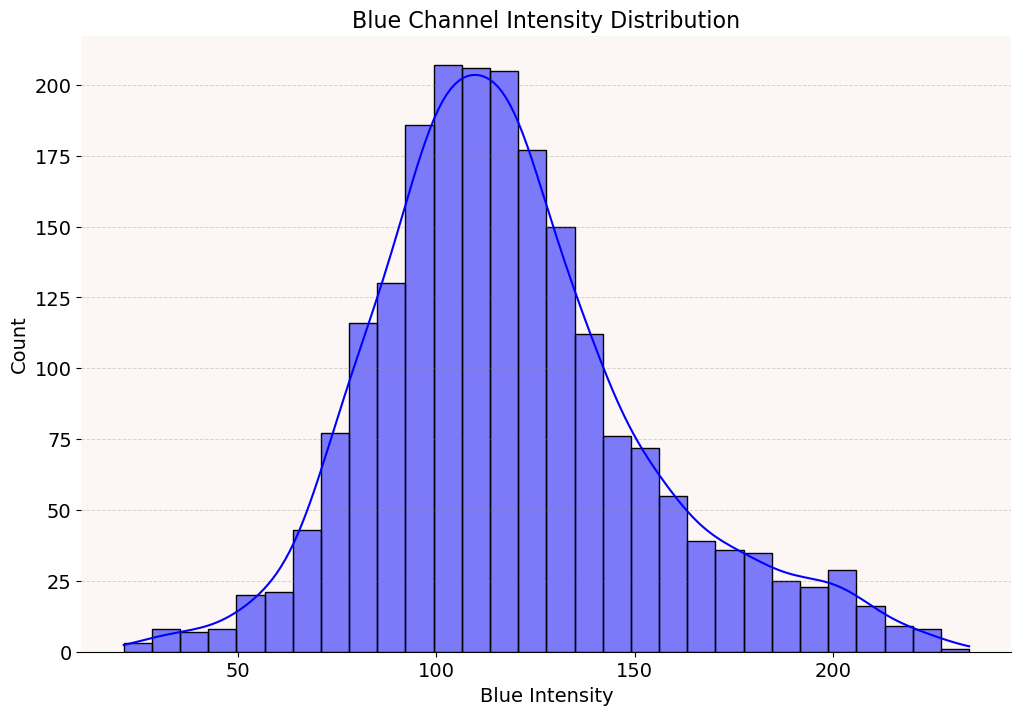

In [57]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the histogram for the Blue channel
sns.histplot(rgb_df['Blue_Intensity'], bins=30, color='blue', kde=True)

#Set Title, x & y axis names, face color
plt.title('Blue Channel Intensity Distribution', fontsize=16)
ax.set_xlabel("Blue Intensity",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
ax.tick_params(labelsize=14)
ax.set_facecolor('#FCF6F5')

#Remove lines of grid perimeter to make more appealing.
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Set background of grid to custom color.
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3, zorder=1)

#Display plot
plt.show()

## Section 3: Inferential Analysis

This dataset does not make sense to do an inferential analysis on the images, as it probably won't reveal any meaningful differences among pixels right off the bat. That would require an advanced deep learning approach to extract deep heuristics and learn on those heuristics. We could do an analysis on RGB intensity, but I don't think that would help us moving forward.

## Section 4: Analysis

This is going to be an interesting dataset to work with. There are 2100 images total. To set up the images in a way to work with, it required pythonic scripts to create new directories and sort them by reading the JSON files associated with each image. I was able to read each class and organize the images by class, or multiclass if an image had multiple classes in it and move them to the specific directory in which they belong. This will also help in the next section.

In this EDA, we explored numerous aspects of the image dataset, such as how many classes there are, the image aspect ratio of all the images, the width and height distribution of all of the images, and the mean RGB values across all of the images. The image width's and height's are positively skewed, with the majority of images having 1000 pixel width and majority of images having 1000 pixel height. The average RGB channel distribution have most images around 115 for all color channels. This will be interesting to work with in the next section, which will be machine learning on our images!